# Create AI Agents that work with your PDFs using Chunkr & Mistral AI

You can also check this cookbook in colab [here](https://colab.research.google.com/drive/1mJt-yCegEyUpNlrODKAzRh2DpDXmfvyA?usp=sharing)

In this blog, we’ll introduce Chunkr, a cutting-edge document processing API designed for seamless and scalable data extraction and preparation, ideal for Retrieval-Augmented Generation (RAG) workflows and large language models (LLMs). Chunkr has been integrated with CAMEL. We’ll explore its three core capabilities—Segment, OCR, and Structure—each optimized to enhance document understanding and make data integration effortless. Finally, we’ll wrap up with a conclusion and a call to action.

Key tools utilized in this notebook include:

*   **CAMEL**: A powerful multi-agent framework that enables Retrieval-Augmented Generation and multi-agent role-playing scenarios, allowing for sophisticated AI-driven tasks.
*   **Chunkr**: A powerful document processing API built for efficient and scalable data extraction and preparation, perfect for Retrieval-Augmented Generation (RAG) workflows and large language models (LLMs).
*   **Mistral AI**: A series of high-performance LLMs.


## Table of Content:

1.  🧑🏻‍💻 Introduction

2.  ⚡️ Step-by-step Guide of Digesting PDFs with Chunkr

3.  💫 Quick Demo with CAMEL Agent

4.  🧑🏻‍💻 Conclusion


To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
  <a href="https://www.camel-ai.org/"><img src="https://i.postimg.cc/KzQ5rfBC/button.png"width="150"></a>
  <a href="https://discord.camel-ai.org"><img src="https://i.postimg.cc/L4wPdG9N/join-2.png"  width="150"></a></a>
  
⭐ <i>Star us on [*Github*](https://github.com/camel-ai/camel), join our [*Discord*](https://discord.camel-ai.org) or follow our [*X*](https://x.com/camelaiorg)
</div>

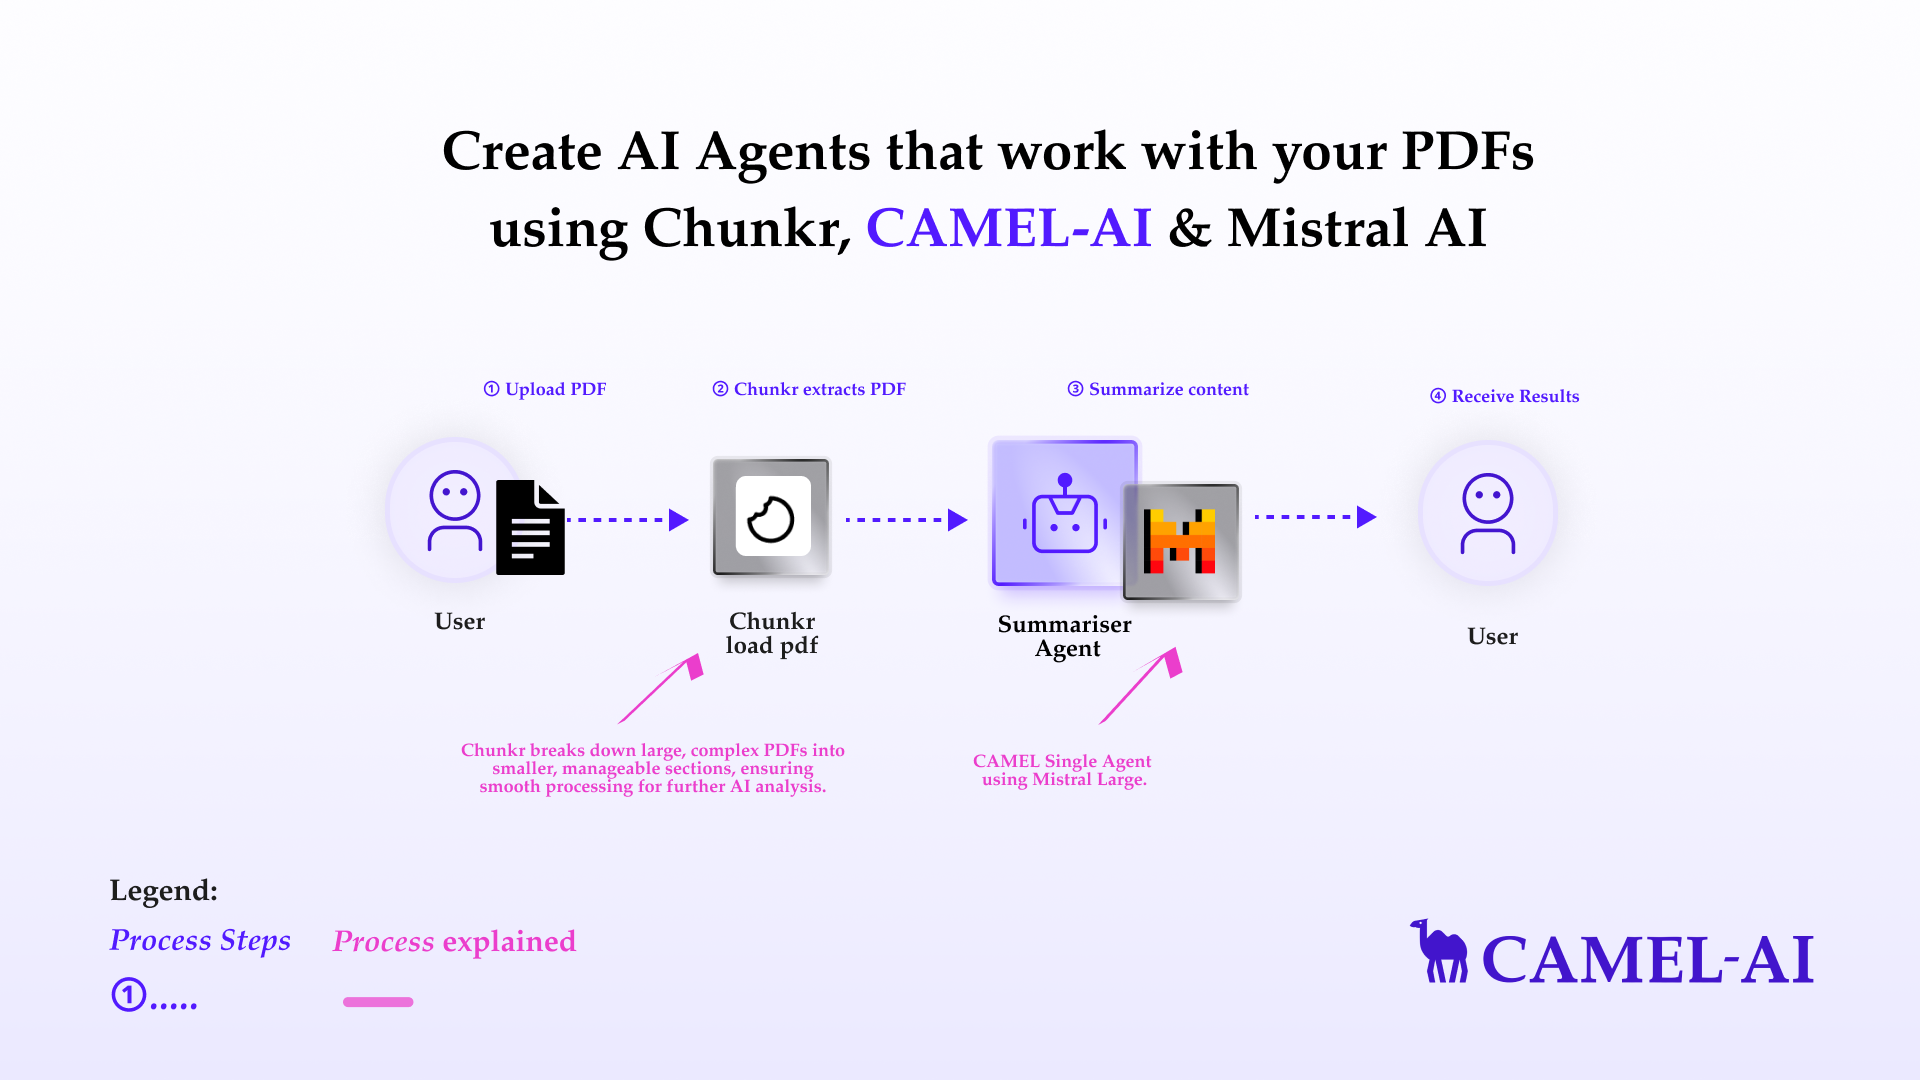

## **Introduction**

Chunkr is a versatile API designed to revolutionize how documents are processed and made ready for advanced AI applications like RAG and LLMs. From extracting text to structuring complex layouts, Chunkr simplifies the workflow of transforming raw documents into actionable data.

#### **Key Features of Chunkr:**

1.   Document Segmentation:

  *   Breaks down documents into coherent chunks using transformer-based models.

  *   Provides a logical flow of content, maintaining the context needed for efficient data analysis.

2.  Advanced OCR (Optical Character Recognition) Capabilities:

  *   Extracts text and bounding boxes from images or scanned PDFs using high-precision OCR.

  *   Makes content searchable, analyzable, and ready for integration into AI models.
3. Semantic Layout Analysis:

  *   Detects and tags content elements like headers, paragraphs, tables, and figures.

  *   Converts document layouts into structured outputs like HTML and Markdown.


#### **Why Use Chunkr?**

*   Optimized for AI: Simplifies preparing data for LLMs and other AI models.

*   Multi-Format Compatibility: Processes PDFs, DOCX, PPTX, XLSX, and more.

*  Scalable Deployment: Use locally for small projects or deploy at scale with Kubernetes. Also, it is open-source!


In this blog, we will focus on the capability of digesting PDF file with Chunkr.



## 📦 Installation

First, install the CAMEL package with all its dependencies.

In [ ]:
pip install "camel-ai[all]==0.2.75"

# ⚡️ Step-by-step Guide of Digesting PDFs with Chunkr





Step 1: Set up your [chunkr API key](https://docs.chunkr.ai/quickstart).

If you don't have a chunkr API key, you can obtain one by following these steps:

1. Create an account:

Go to [chunkr.ai ](https://www.chunkr.ai/)and sign up for an account.

2. Get your API key:

Once logged in, navigate to the API section of your account dashboard to find your API key. A new API key will be generated. Copy this key and store it securely.

In [ ]:
import os
from getpass import getpass
# Prompt for the Chunkr API key securely

chunkr_api_key = getpass('Enter your API key: ')
os.environ["CHUNKR_API_KEY"] = chunkr_api_key

Alternatively, if running on Colab, you could save your API keys and tokens as **Colab Secrets**, and use them across notebooks.

To do so, **comment out** the above **manual** API key prompt code block(s), and **uncomment** the following codeblock.

⚠️ Don't forget granting access to the API key you would be using to the current notebook.

In [6]:
# import os
# from google.colab import userdata

# os.environ["CHUNKR_API_KEY"] = userdata.get("CHUNKR_API_KEY")

Alternatively, if running on your own terminal, you could save your API keys and tokens in **.env**, and use them across notebooks.

Just add CHUNKR_API_KEY="Your_api_key" in .env file

In [ ]:
# from dotenv import load_dotenv
# import os

# load_dotenv()  # Load environment variables from .env file
# chunkr_api_key = os.getenv("CHUNKR_API_KEY")

Step 2: Let's load the example PDF file from https://arxiv.org/pdf/2303.17760.pdf. This will be our local example data.



In [12]:
import os
import requests

os.makedirs('local_data', exist_ok=True)

url = "https://arxiv.org/pdf/2303.17760.pdf"
response = requests.get(url)
with open('local_data/camel_paper.pdf', 'wb') as file:
     file.write(response.content)

In [ ]:
# Extract the first page of the PDF and save it as a new PDF file to be used for the example.
# This is done simply to reduce the size of the PDF to reduce api usage
import PyPDF2

input_path = "local_data/camel_paper.pdf"
output_path = "local_data/camel_paper_first_page.pdf"

with open(input_path, "rb") as infile:
    reader = PyPDF2.PdfReader(infile)
    writer = PyPDF2.PdfWriter()
    
    # Extract first page (index 0)
    writer.add_page(reader.pages[0])
    
    # Save new PDF
    with open(output_path, "wb") as outfile:
        writer.write(outfile)


Step 3: Submit one task.

In [ ]:
# Importing the ChunkrReader class from the camel.loaders module
# This class handles document processing using Chunkr's capabilities
from camel.loaders import ChunkrReader
import nest_asyncio
nest_asyncio.apply() 

# Initializing an instance of ChunkrReader
# This object will be used to submit tasks and manage document processing
chunkr_reader = ChunkrReader()

# Submitting a document processing task
# Replace "local_data/example.pdf" with the path to your target document
task_id=await chunkr_reader.submit_task(file_path="local_data/camel_paper_first_page.pdf")

Step 4: Input the task id above and then we can obtain the task output.

The output of Chunkr is structured text and metadata from documents, including:

1.   **Formatted Content**: Text in structured formats like JSON, HTML, or Markdown.

2.   **Semantic Tags**: Identifies headers, paragraphs, tables, and other elements.

3.   **Bounding Box Data**: Spatial positions of text (x, y coordinates) for OCR-processed documents.

4.   **Metadata**: Information like page numbers, file type, and document properties.

In [16]:
# Retrieving the output of a previously submitted task
chunkr_output = await chunkr_reader.get_task_output(task_id=task_id)
print(chunkr_output)

{
    "configuration": {
        "chunk_processing": {
            "ignore_headers_and_footers": true,
            "target_length": 512,
            "tokenizer": {
                "Enum": "Word"
            }
        },
        "expires_in": null,
        "error_handling": "Fail",
        "high_resolution": true,
        "ocr_strategy": "Auto",
        "segment_processing": {
            "caption": {
                "html": null,
                "llm": null,
                "markdown": null,
                "crop_image": "Auto",
                "embed_sources": [
                    "Content"
                ],
                "extended_context": false
            },
            "footnote": {
                "html": null,
                "llm": null,
                "markdown": null,
                "crop_image": "Auto",
                "embed_sources": [
                    "Content"
                ],
                "extended_context": false
            },
            "formula": {
 

## 💫 Quick Demo with CAMEL Agent

Here we choose Mistral model for our demo. If you'd like to explore different models or tools to suit your needs, feel free to visit the [CAMEL documentation page](https://docs.camel-ai.org/), where you'll find guides and tutorials.


If you don't have a Mistral API key, you can obtain one by following these steps:

1. Visit the Mistral Console (https://console.mistral.ai/)

2. In the left panel, click on API keys under API section

3. Choose your plan

For more details, you can also check the Mistral documentation: https://docs.mistral.ai/getting-started/quickstart/

In [ ]:
import os
from getpass import getpass

mistral_api_key = getpass('Enter your API key')
os.environ["MISTRAL_API_KEY"] = mistral_api_key

Enter your API key··········


In [ ]:
# import os
# from google.colab import userdata

# os.environ["MISTRAL_API_KEY"] = userdata.get("MISTRAL_API_KEY")

In [ ]:
# from dotenv import load_dotenv
# import os

# load_dotenv()  # Load environment variables from .env file
# MISTRAL_API_KEY = os.getenv("MISTRAL_API_KEY")

In [18]:
from camel.configs import MistralConfig
from camel.models import ModelFactory
from camel.types import ModelPlatformType, ModelType

mistral_model = ModelFactory.create(
    model_platform=ModelPlatformType.MISTRAL,
    model_type=ModelType.MISTRAL_LARGE,
    model_config_dict=MistralConfig(temperature=0.0).as_dict(),
)

# Use Mistral model
model = mistral_model

In [19]:
from camel.agents import ChatAgent

# Initialize a ChatAgent
agent = ChatAgent(
    system_message="You're a helpful assistant",  # Define the agent's role or purpose
    message_window_size=10,  # [Optional] Specifies the chat memory length
    model=model
)

# Use the ChatAgent to generate a response based on the chunkr output
response = agent.step(f"based on {chunkr_output}, give me a conclusion of the content")

# Print the content of the first message in the response, which contains the assistant's answer
print(response.msgs[0].content)

The provided content is an excerpt from a research paper titled **"CAMEL: Communicative Agents for 'Mind' Exploration of Large Language Model Society"**. Based on the abstract and introduction, here’s a concise **conclusion** summarizing the key points and contributions of the work:

---

### **Conclusion**
The paper addresses a critical challenge in the field of **large language models (LLMs)**: their heavy reliance on **human guidance** for complex task-solving, which can be inefficient, time-consuming, and sometimes infeasible due to domain-specific expertise requirements. To mitigate this dependency, the authors propose a **novel communicative agent framework** called **role-playing**, leveraging **inception prompting** to enable autonomous cooperation among agents while aligning with human intentions.

Key contributions include:
1. **Autonomous Cooperation**: Introducing a scalable framework for **multi-agent systems** to collaborate with minimal human supervision, reducing the ne

**For advanced usage of RAG capabilities with large files, please refer to our [RAG cookbook](https://docs.camel-ai.org/cookbooks/agents_with_rag.html).**

## 🌟 Highlights

In conclusion, integrating Chunkr within CAMEL-AI revolutionizes the process of document data extraction and preparation, enhancing your capabilities for AI-driven applications. With Chunkr’s robust features like Segment, OCR, and Structure, you can seamlessly process complex documents into structured, machine-readable formats optimized for LLMs, directly feeding into CAMEL-AI’s multi-agent workflows. This integration not only simplifies data preparation but also empowers intelligent and accurate analytics. With these tools at your disposal, you’re equipped to transform raw document data into actionable insights, unlocking new possibilities in automation and AI-powered decision-making.


Key tools utilized in this notebook include:

*   **CAMEL**: A powerful multi-agent framework that enables Retrieval-Augmented Generation and multi-agent role-playing scenarios, allowing for sophisticated AI-driven tasks.
*   **Chunkr**: An advanced document processing API built for efficient and scalable data extraction and preparation, perfect for Retrieval-Augmented Generation (RAG) workflows and large language models (LLMs).

That's everything: Got questions about 🐫 CAMEL-AI? Join us on [Discord](https://discord.camel-ai.org)! Whether you want to share feedback, explore the latest in multi-agent systems, get support, or connect with others on exciting projects, we’d love to have you in the community! 🤝

Check out some of our other work:

1. 🐫 Creating Your First CAMEL Agent [free Colab](https://docs.camel-ai.org/cookbooks/create_your_first_agent.html)

2.  Graph RAG Cookbook [free Colab](https://colab.research.google.com/drive/1uZKQSuu0qW6ukkuSv9TukLB9bVaS1H0U?usp=sharing)

3. 🧑‍⚖️ Create A Hackathon Judge Committee with Workforce [free Colab](https://colab.research.google.com/drive/18ajYUMfwDx3WyrjHow3EvUMpKQDcrLtr?usp=sharing)

4. 🔥 3 ways to ingest data from websites with Firecrawl & CAMEL [free Colab](https://colab.research.google.com/drive/1lOmM3VmgR1hLwDKdeLGFve_75RFW0R9I?usp=sharing)

5. 🦥 Agentic SFT Data Generation with CAMEL and Mistral Models, Fine-Tuned with Unsloth [free Colab](https://colab.research.google.com/drive/1lYgArBw7ARVPSpdwgKLYnp_NEXiNDOd-?usp=sharingg)

Thanks from everyone at 🐫 CAMEL-AI


<div class="align-center">
  <a href="https://www.camel-ai.org/"><img src="https://i.postimg.cc/KzQ5rfBC/button.png"width="150"></a>
  <a href="https://discord.camel-ai.org"><img src="https://i.postimg.cc/L4wPdG9N/join-2.png"  width="150"></a></a>
  
⭐ <i>Star us on <a href="https://github.com/camel-ai/camel">Github</a> </i>, join our [*Discord*](https://discord.camel-ai.org) or follow our [*X*](https://x.com/camelaiorg)  ⭐
</div>
